### 📚 구체적인 과제 수행 과정

#### 📖 비지도학습 (unsupervised learning)

- 비지도학습(unsupervised learning)은 머신러닝의 한 유형으로, 데이터에 대한 명확한 레이블(타겟변수) 없이 데이터의 구조와 패턴을 학습하는 방식이다. 비지도 학습은 데이터를 분류하거나 예측하기보다는, 데이터를 이해하고 숨겨진 구조를 발견하는 데 중점을 둔다.

#### 비지도학습의 주요개념

- 입력데이터(X): 비지도학습에서는 입력 데이터만 사용하고, 타겟변수(레이블)는 존재하지 않는다. (예 : 고객 구매 기록, 이미지 데이터 등)
- 목표: 데이터의 숨겨진 구조나 패턴을 발견하고, 데이터의 특성을 이해하는 것. 
  
#### 비지도학습의 주요 유형

- 군집화 (Clustering): 유사한 데이터 포인트들을 그룹으로 묶는 작업이다.
    - 대표 알고리즘:
    - K-평균 군집화 (K-Means Clustering): 데이터 포인트를 K개의 군집으로 나눈다.
    - 계층적 군집화 (Hierarchical Clustering): 데이터 포인트를 계층 구조로 군집화한다.
    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise): 밀도 기반 군집화 알고리즘으로, 밀도가 높은 영역을 군집으로 식별한다.
    - 응용: 고객 세그먼테이션, 이미지 분할

- 차원 축소 (Dimensionality Reduction): 고차원 데이터를 저차원으로 변환하는 작업이다.
    - 대표 알고리즘:
    - 주성분 분석 (PCA, Principal Component Analysis): 데이터의 분산을 최대화하는 주성분을 찾는다.
    - t-SNE (t-Distributed Stochastic Neighbor Embedding): 고차원 데이터를 저차원으로 시각화하는 데 사용된다.
    - 응용: 데이터 시각화, 노이즈 제거

- 연관 규칙 학습 (Association Rule Learning): 데이터 항목 간의 연관성을 발견하는 작업이다.
    - 응용: 장바구니 분석, 추천 시스템


#### 1️⃣ 데이터셋 탐색

- pandas 라이브러리의 read 함수 사용하여 데이터 파일을 데이터프레임으로 불러오기

In [3]:
import pandas as pd

# 데이터 로드
# csv 파일 불러오기 
df = pd.read_csv('./data/Mall_Customers.csv')

# 데이터 확인
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


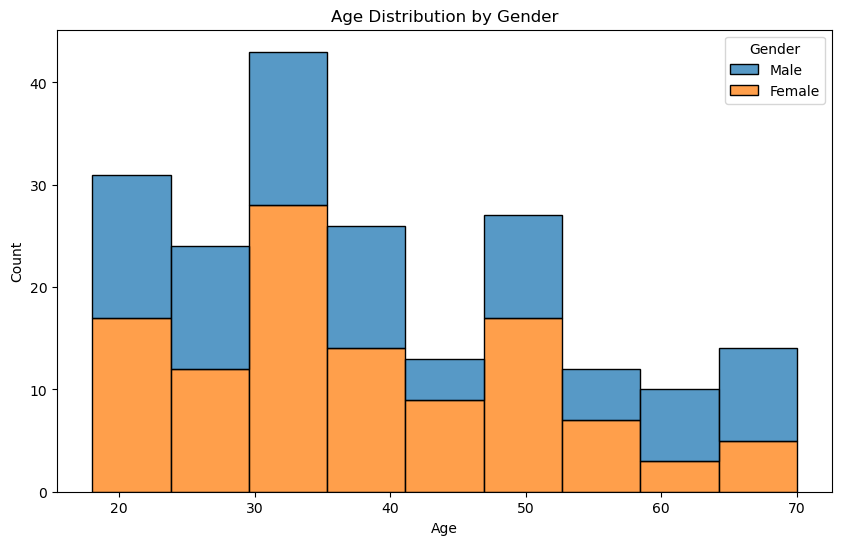

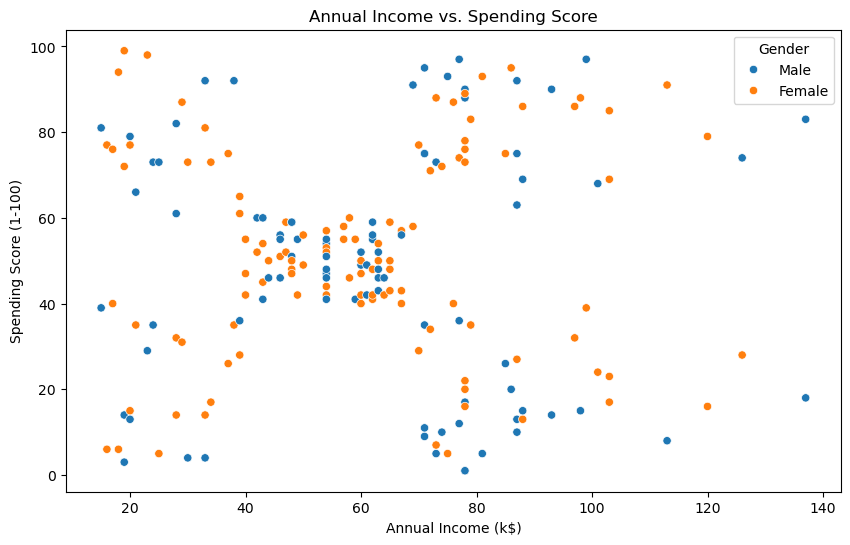

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별에 따른 연령 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 연간 소득과 소비 점수의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [5]:
print('Mall_Customers.csv 데이터 탐색')
print('-'*100)

# 데이터프레임의 정보 확인 (컬럼, 결측값, 데이터 타입 등)
df.info()
print('-'*100)

print(f'컬럼 : {list(df.columns)}')
print('-'*100)

print(f'데이터프레임의 크기 (행,열) : {df.shape}')
print('-'*100)

# 데이터프레임의 요약 통계량 확인
df.describe() 

Mall_Customers.csv 데이터 탐색
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
----------------------------------------------------------------------------------------------------
컬럼 : ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
----------------------------------------------------------------------------------------------------
데이터프레임의 크기 (행,열) : (200, 5)
----------------------------------------

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 💡 Mall_Customers.csv 파일을 데이터프레임으로 만든 후 여러 메서드를 사용해 탐색한 결과

1. 200행, 5열의 데이터프레임이다.
2. 총 5개의 컬럼이 존재한다. ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
3. range index(연속 정수형 인덱스)가 총 200개, 즉, 0부터 199인덱스까지 있음을 알 수 있다.
4. 모든 컬럼에 결측값이 존재하지 않는다.
5. 'Gender' 컬럼의 데이터만 object 타입, 나머지 컬럼은 모두 정수형 데이터를 가진다.

#### 2️⃣ 데이터셋 전처리 (결측치 처리, 이상치 탐지 및 제거, 특징 선택)

❗️전처리를 하려고 봤는데.. 음 일단 결측값은 없고, 데이터의 크기가 크지 않아서 무슨 값을 가지는 컬럼인지 확인하고 눈에 띄는 값이 있나 확인했는데 딱히 이상치라고 할 만한 것이 안 보인다..
그래서 일단 이상치 처리는 건너뛰고 나중에 돌아와서 IQR 방법을 써준다음 모델의 성능이 더 좋아지는 지 확인하겠다.

#### 📝 스케일링

데이터의 스케일링은 각 특징 (**숫자형 데이터**)의 값을 일정한 범위로 조정하여 모델의 성능을 향상시키고, 수렴 속도를 빠르게 한다.

많은 머신러닝 알고리즘은 데이터의 스케일에 민감하다. 스케일이 다른 특징이 모델 성능에 부정적인 영향을 미칠 수 있다. 특징 간의 값 범위가 큰 차이가 나면 가중치 계산에 영향을 미칠 수 있다. 이를 방지하기 위해 각 특징의 값을 유사한 범위로 조정하는 것이다.

따라서 스케일링은 머신러닝 모델의 성능과 수렴 속도를 개선하기 위해 중요한 단계이다. 

특히 다양한 스케일을 가진 데이터를 다룰 때 유용하다. 스케일링의 주요 목표는 특징 간의 불균형을 줄이고 데이터의 분포를 일정하게 만드는 것이다. 

✅ 스케일링 기법에는 표준화(Standardization)와 정규화(Normalization)가 있다. 

이들은 데이터의 평균, 표준편차, 최대최소값 등을 이용해 데이터를 변환하기 때문에 카테고리형(범주형) 데이터에는 이 방법들을 적용할 수 없고, 숫자형 데이터에만 적용 가능하다. (범주형 데이터는 인코딩과 같은 방식으로 숫자형 데이터로 변환해야 한다.)

**표준화(Standardization)**
- 데이터의 평균을 0, 표준편차를 1로 조정하여 정규 분포를 따르도록 변환한다.
- 적용상황
    - 데이터가 정규분포를 따르거나 정규분포로 가정되는 경우
    - 각 특징의 값 범위가 크게 다를 때
    - 회귀 분석, SVM, K-평균 군집화 등 **거리 기반 알고리즘**에 사용

**정규화(Normalization)** 
- 데이터의 범위를 0과 1사이로 조정한다.
- 적용상황
    - 데이터의 분포가 정규분포를 따르지 않는 겨우
    - 각 특징의 값 범위가 일정한 경우
    - **신경망**, KNN 등 특징의 값 범위가 중요할 때 
  
표준화와 정규화를 사용하여 정수형 컬럼의 데이터를 스케일링 해주자. 

해당 과제에서 K-평균 군집화, 계층적 군집화, DBSCAN 모델을 사용할 건데 이들이 모두 거리 기반 알고리즘이므로 표준화를 사용하여 스케일링 해주겠다. 

CustomerID 컬럼은 각 고객을 구분하기 위한 값일 뿐, 군집화나 모델링 과정에서 직접적으로 사용되지 않는 변수이므로 학습할 특징으로 사용하지 않겠다.


In [6]:
from sklearn.preprocessing import StandardScaler

# 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'의 표준화
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# 결과 확인
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061
196,197,Female,0.441365,2.497807,-0.861839
197,198,Male,-0.491602,2.497807,0.923953
198,199,Male,-0.491602,2.917671,-1.250054


✅ 인코딩(encoding)

인코딩은 머신러닝 모델이 범주형(카테고리형) 데이터를 처리할 수 있도록 도와주는 중요한 전처리 단계이다. 

대부분의 머신러닝 알고리즘은 숫자형 데이터를 요구하므로,범주형 데이터를 그대로 입력하면 모델이 이를 인식하고 처리할 수 없다. 또한 알고리즘은 입력된 데이터를 기반으로 수치연산을 수행하여 예측 및 분류를 수행한다. 인코딩을 통해 범주형 데이터의 고유한 특성을 수치형 데이터로 표현해야 알고리즘이 데이터의 특징 간의 관계를 학습할 수 있다.

따라서 범주형 데이터를 수치 데이터로 변환해야 한다.

#### 주요 인코딩 방법

- 레이블 인코딩 (Label Encoding) : 각 범주를 순서가 있는 고유한 숫자로 매핑한다.
    - 예: "남성" -> 0, "여성" -> 1
    - 범주형 데이터에 순서가 있을 때 적합하다. 순서가 없는 데이터에 사용하면, 모델이 이 값을 크기로 인식해 잘못된 결과를 초래할 수 있다.

- 원-핫 인코딩 (One-Hot Encoding): 각 범주를 이진 벡터로 변환한다. 각 범주에 대해 별도의 열을 생성하고, 해당 범주에 속하는 데이터는 1, 나머지는 0으로 표시된다.
    - 예: "남성" -> [1, 0], "여성" -> [0, 1]
    - 범주형 데이터에 순서가 없을 때 적합하다. 모델이 범주 간의 순서나 관계를 인식하지 않고 각 범주르 독립적으로 처리할 수 있다.

- 차원 축소 인코딩 : 범주형 데이터가 많을 때 유용하다. 각 범주를 데이터셋 내에서의 출현 빈도로 인코딩한다.
  
- 순서형 인코딩 : 순서가 있는 범주형 데이터를 그 순서에 따라 숫자로 변환하는 방식이다. (예: 만족도(낮음, 중간, 높음) 등)


Gender 컬럼의 경우 범주형 데이터이고, 순서가 없기 때문에 원-핫 인코딩을 적용하겠다. (원-핫 인코딩은 범주형 데이터의 순서나 크기 정보를 반영하지 않는다.)

남성과 여성을 별도의 열로 분리하여 모델이 이를 올바르게 이해할 수 있게 한다.

* 원-핫 인코딩된 범주형 데이터와 표준화된 연속형 데이터는 서로 다른 의미를 가지기 때문에, 수치적으로 다른 범위를 가져도 괜찮다.

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Gender 컬럼 원-핫 인코딩

# OneHotEncoder 객체를 생성하여 ohe에 저장
ohe = OneHotEncoder()

# fit_transform 메서드는 인코더를 학습시키고, 변환된 결과를 반환한다. toarray() 메서드를 사용하여 결과를 배열 형태로 변환한다.
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()

# 인코딩 결과를 데이터프레임으로 변환
                                                  # 인코딩된 컬럼 이름을 반환
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# 원본 데이터프레임에 인코딩된 데이터프레임을 병합하고, 원본데이터에서 Gender 컬럼을 삭제한다.
df = pd.concat([df, gender_df], axis=1).drop(columns=['Gender'])

# 이제 df는 원-핫 인코딩된 Gender 컬럼을 포함한다.

# 결과 확인 (여성과 남성이 나뉘어서 새로운 열로 추가됐음을 볼 수 있을 것이다.)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,-1.424569,-1.738999,-0.434801,0.0,1.0
1,2,-1.281035,-1.738999,1.195704,0.0,1.0
2,3,-1.352802,-1.700830,-1.715913,1.0,0.0
3,4,-1.137502,-1.700830,1.040418,1.0,0.0
4,5,-0.563369,-1.662660,-0.395980,1.0,0.0
...,...,...,...,...,...,...
195,196,-0.276302,2.268791,1.118061,1.0,0.0
196,197,0.441365,2.497807,-0.861839,1.0,0.0
197,198,-0.491602,2.497807,0.923953,0.0,1.0
198,199,-0.491602,2.917671,-1.250054,0.0,1.0


이제 데이터셋의 전처리가 끝났으니 모델을 만들어보자! (K-평균 군집화, 계층적 군집화, DBSCAN 모델)

#### 🤖 k-means clustering (k-평균 군집화) : 데이터 포인트들을 k개의 군집으로 나누는 것

#### ☑️ **알고리즘의 단계**

1. **초기화**: k개의 군집 중심을 랜덤하게 설정한다.
2. **할당 단계**: 각 데이터 포인트를 가장 가까운 군집 중심에 할당한다.
3. **업데이트 단계**: 각 군집의 중심을 해당 군집에 속한 데이터 포인트들의 평균으로 업데이트한다.
4. **반복**: 할당 단계와 업데이트 단계를 군집 중심이 더 이상 변화하지 않을 때까지 반복한다.

#### ☑️ 거리 측정 방법

- k-means 알고리즘은 주로 유클리드 거리(Euclidean Distance)를 사용하여 데이터 포인트와 군집 중심 간의 거리를 계산한다.

#### ☑️ **엘보우 방법**

- 최적의 k를 선택하는 데 사용된다.
- k를 증가시키면서 각 k에 대한 군집의 응집도(또는 관성, Inertia)를 계산하고, 이를 그래프로 나타내어 그래프에서 응집도가 급격히 감소하는 지점을 찾는다.


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

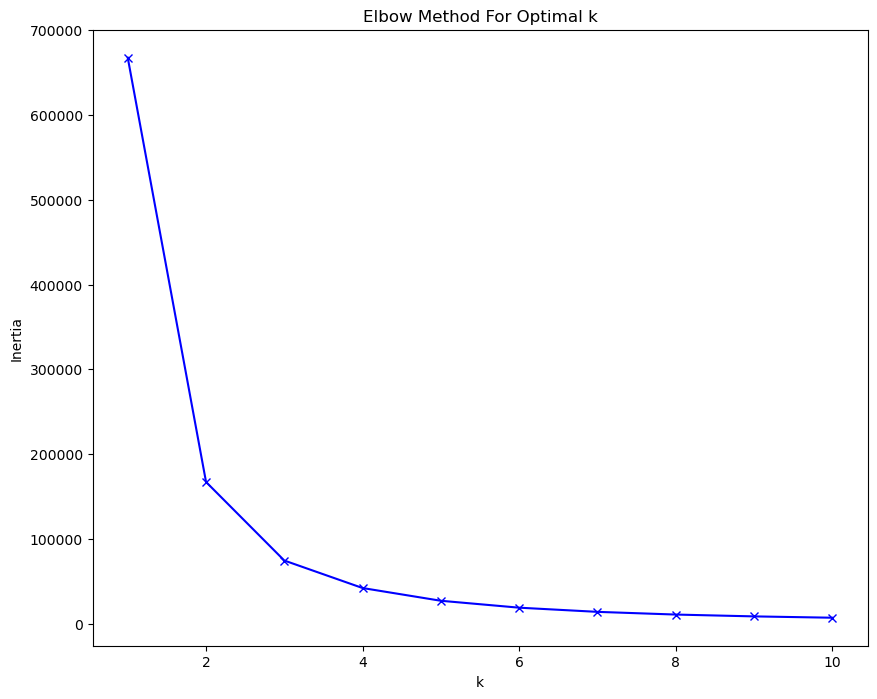

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# KMeans 클래스는 K-평균 군집화 알고리즘을 구현하는 데 사용된다. 이 클래스는 데이터 포인트를 k개의 군집으로 나누고, 각 군집의 중심(센트로이드)을 찾는다.
from sklearn.cluster import KMeans

# 최적의 k 찾기 (엘보우 방법을 사용하여 군집 수 k의 최적값을 찾는 과정)

# 군집의 관성(inertia)을 저장할 빈 리스트
# 관성: 각 군집의 중심과 해당 군집 내 데이터 포인트들 간의 거리 합을 나타냄
inertia = []

# 범위 내에서 최적의 k를 찾기 위해 여러 값을 시도함
K = range(1, 11)
for k in K:           # 군집 수
    kmeans = KMeans(n_clusters=k, random_state=42)
    # df를 사용하여 모델 학습 시키기
    kmeans.fit(df)
    # 각 k값에 대한 관성을 계산하여 리스트에 추가
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기

# 그래프의 크기 설정
plt.figure(figsize=(10, 8))

# k값에 따른 관성을 플롯. 파란색 x마커와 선을 사용하여 그래프를 그림
plt.plot(K, inertia, 'bx-')

# x축 레이블 설정
plt.xlabel('k')
# y축 레이블 설정
plt.ylabel('Inertia')
# 그래프 제목 설정
plt.title('Elbow Method For Optimal k')

# 그래프 화면에 출력
plt.show()


엘보우 방법을 사용하여 최적의 k 값을 찾는 것은 관성의 급격한 감소가 완화되는 "팔꿈치" 지점을 찾는 것이다.

그래프에서 관성이 급격히 감소하다가 완만해지는 지점이 "팔꿈치"처럼 보인다.

이 지점이 최적의 k 값을 나타낸다.

예를 들어, 그래프에서 k=5 근처에서 팔꿈치가 보인다면, k=5가 최적의 군집 수이다.

예시 해석
- K = range(1, 11): k 값을 1부터 10까지 설정하여 최적의 군집 수를 찾는다.
- inertia: 각 k 값에 따른 관성을 계산하여 리스트에 저장한다.
- 엘보우 그래프를 통해 최적의 k 값을 시각적으로 찾는다. 예를 들어, 그래프에서 k=5에서 팔꿈치가 보이면, k=5가 최적의 군집 수이다.

In [20]:
# 엘보우 그래프를 확인하여 최적의 k값(군집 수)을 5로 결정하고 모델을 학습시킴

# k=5로 모델 생성 및 학습
# n_clusters=5 : 생성할 군집의 수 5
# n_init 매개변수는 모델을 실행하는 횟수를 설정한다. 여기서 10은 알고리즘을 10번 실행한 후, 가장 좋은 결과(관성이 가장 작은 결과)를 선택한다는 의미이다.
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(df)

# 모델이 각 데이터 포인트에 할당한 군집 라벨을 df의 새로운 컬럼 Cluster로 추가해줌
# labels_ : 각 데이터 포인트가 속한 군집 레이블을 반환
df['Cluster'] = kmeans.labels_

#### 👀 군집 시각화

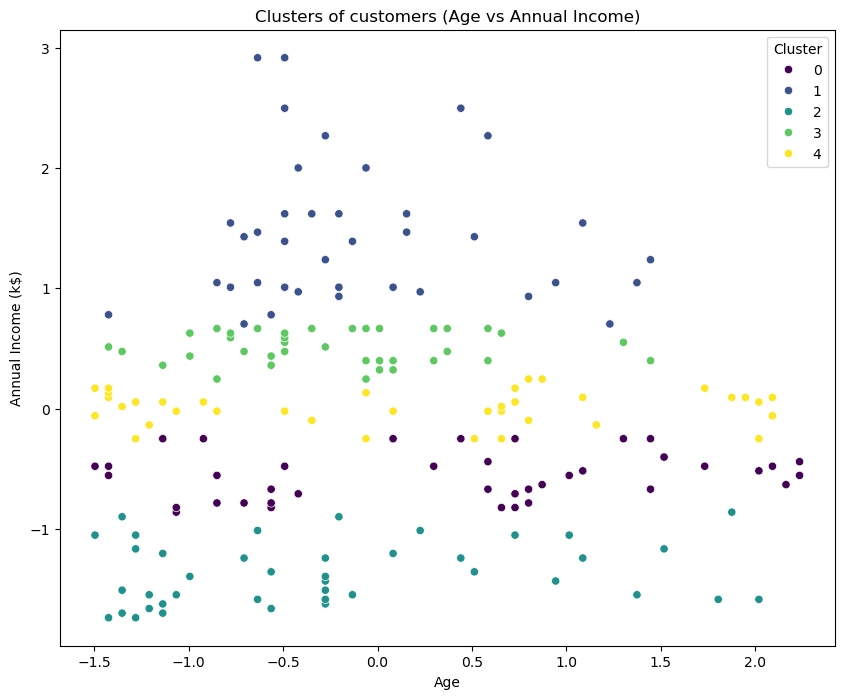

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2차원으로 군집 시각화 (연령 vs 연간소득)
plt.figure(figsize=(10, 8))
# 산점도 (x축=고객나이, y축=고객 연간소득,hue(색상)=서로 다른 군집을 나타냄. 같은 색상의 점들은 동일한 군집에 속한 고객을 나타냄)
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

같은 색상의 고객들은 유사한 나이와 소득을 가진다는 의미이다. 

서로 다른 색상의 고객들은 서로 다른 특성을 가진 그룹을 나타낸다. (지금 5개로 군집화했음)

약간 고르게 분포해 있는 모습?

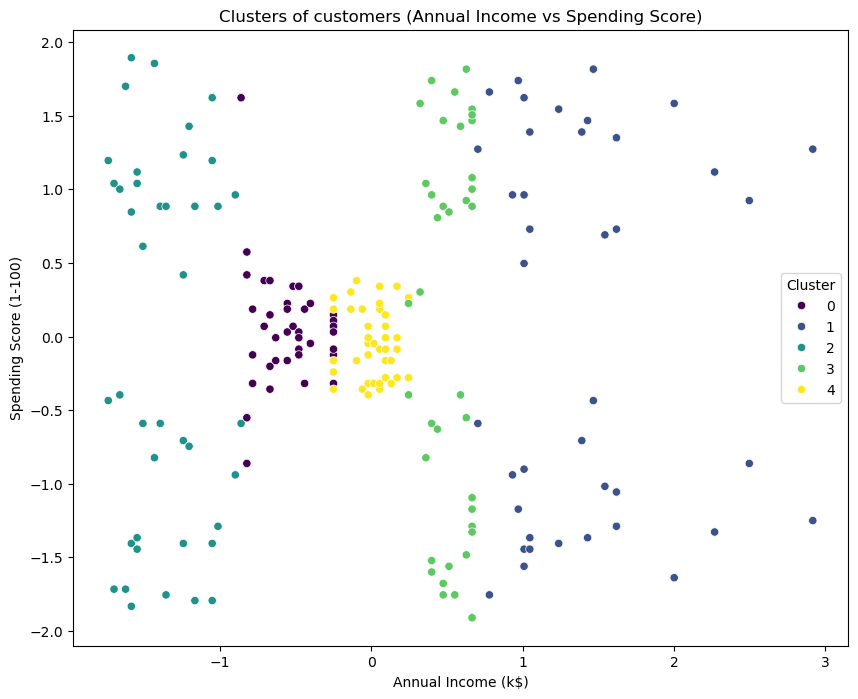

In [15]:
# 2차원으로 군집 시각화 (연간소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
# 산점도
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

소득과 지출점수에 따라 고객들이 어떻게 그룹으로 나뉘어졌는지를 볼 수 있다.

같은 색상의 고객들은 유사한 소득과 소비패턴을 가진다.

나이가 평균이하이고 연간소득이 중위 수준에 머무르는 구역에 사람들이 특히 많이 몰려있는 것을 알 수 있다. 
(이 그룹의 사람들이 쇼핑을 많이 하나봄!)

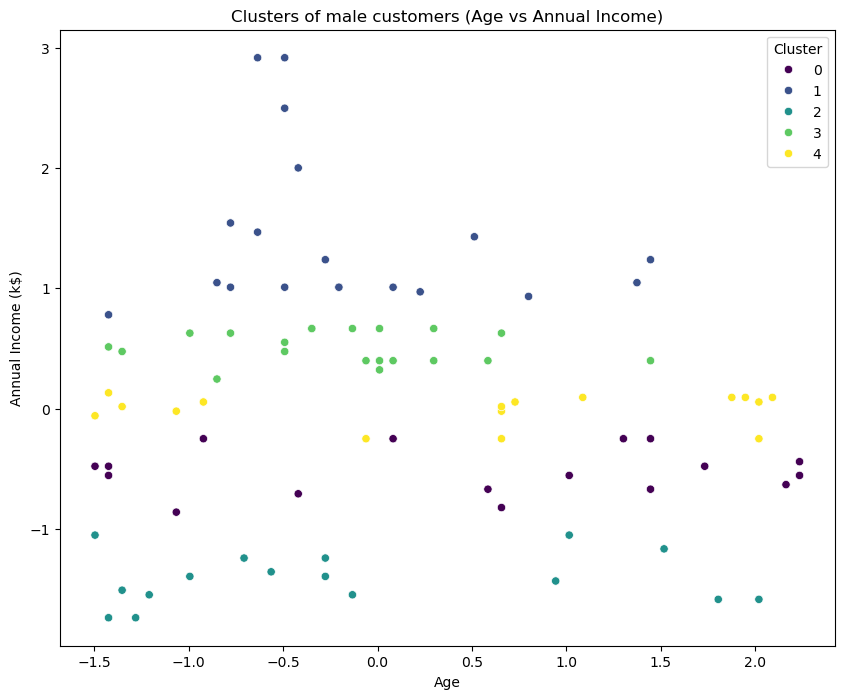

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 남성과 여성 고객들이 나이와 소득에 따라 어떻게 그룹으로 나뉘는지 비교하자(성별에 따라 유사한 특징을 가진 군집이 존재하는지 확인)

# 성별 분리 (남성)
plt.figure(figsize=(10, 8))
# x축=남성고객나이, y축=남성고객 연간소득
sns.scatterplot(x=df[df['Gender_Male'] == 1]['Age'], y=df[df['Gender_Male'] == 1]['Annual Income (k$)'], hue=df[df['Gender_Male'] == 1]['Cluster'], palette='viridis')
plt.title('Clusters of male customers (Age vs Annual Income)')
plt.show()

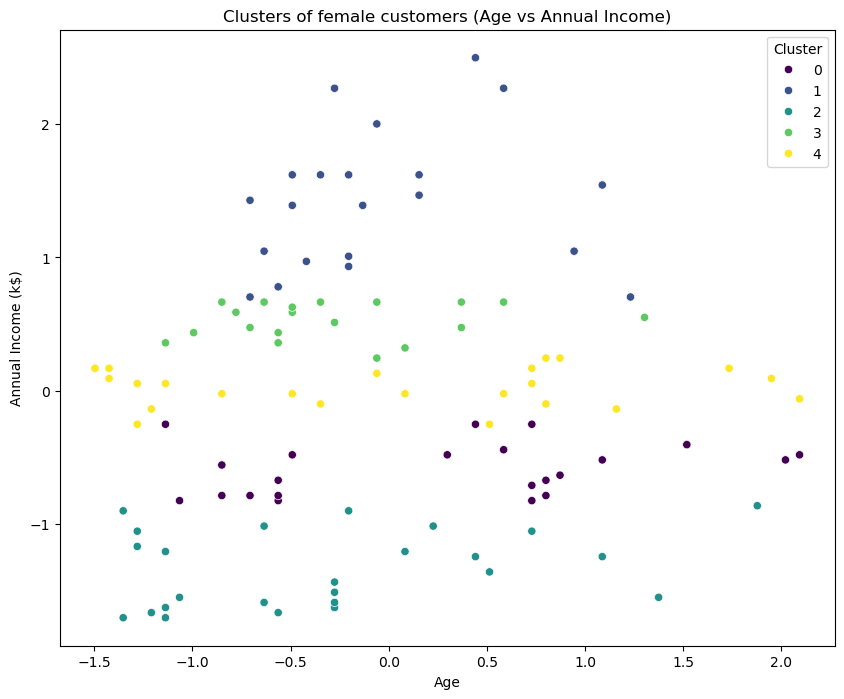

In [16]:
# 성별 분리 (여성)
plt.figure(figsize=(10, 8))
# # x축=여성고객나이, y축=여성고객 연간소득
sns.scatterplot(x=df[df['Gender_Female'] == 1]['Age'], y=df[df['Gender_Female'] == 1]['Annual Income (k$)'], hue=df[df['Gender_Female'] == 1]['Cluster'], palette='viridis')
plt.title('Clusters of female customers (Age vs Annual Income)')
plt.show()

여성 고객이 더 많다는 것은 알겠다.

연령, 연간소득, 성별 간의 관계를 살펴보기 위해 3차원 그래프를 그려보자

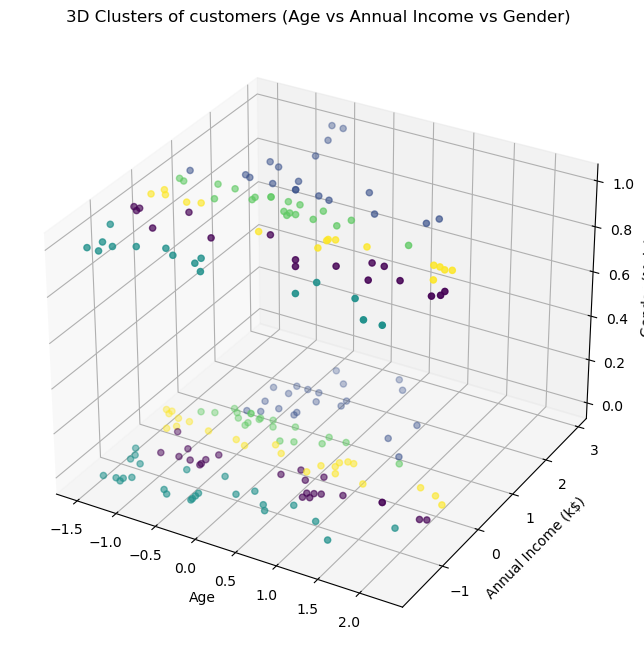

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt


# 3차원 시각화 (연령 vs 소득 vs 성별)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Gender_Male'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Gender (Male)')
plt.title('3D Clusters of customers (Age vs Annual Income vs Gender)')
plt.show()

세 가지 축(연령, 연간 소득, 성별)에서 데이터 포인트들이 어떻게 분포되어 있는지 분석한다.

각 점은 하나의 고객을 나타내며, 색상은 해당 고객이 속한 군집을 나타낸다.

예를 들어, 특정 군집이 특정 연령대와 소득 수준에서 주로 남성으로 구성되어 있는지 또는 다른 군집이 특정 소득 범위에서 여성으로 구성되어 있는지 등을 확인할 수 있다.